<a href="https://colab.research.google.com/github/ShathaMelhem/AI/blob/main/superstore_EDA1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impotring Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sales-forecasting


In [9]:
df = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')


# Discovering Dataset

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


In [14]:
# Total number of missing values of each column

df_null=df.isnull().sum()
df_null[df_null>0]
 # no nulls


,0
Postal Code,11


In [15]:
# Total number of missing values
df_null_sum=df.isnull().sum().sum()
print("Total missing values:", df_null_sum)
#no missing values

Total missing values: 11


In [16]:

percent=df.isnull().mean()*100
print(percent[percent>0])

Postal Code    0.112245
dtype: float64


In [17]:
duplicates=df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


In [18]:
df.shape

(9800, 18)

In [19]:
df.count()

,0
Row ID,9800
Order ID,9800
Order Date,9800
Ship Date,9800
Ship Mode,9800
Customer ID,9800
Customer Name,9800
Segment,9800
Country,9800
City,9800


In [20]:
df['Sales'].value_counts()

,count
Sales,
12.960,55
19.440,39
15.552,39
10.368,35
25.920,34
...,...
2.496,1
10.984,1
364.080,1


In [21]:
df['Category'].value_counts()

,count
Category,
Office Supplies,5909
Furniture,2078
Technology,1813


# Seperate Numerical and Categorical Data

In [22]:
cat_col=df.select_dtypes(include=['object'])
cat_col.columns


Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [23]:
num_col=df.select_dtypes(include=['number'])
num_col.columns

Index(['Row ID', 'Postal Code', 'Sales'], dtype='object')

# EDA

## Univariate analysis
to study each variable alone

histogram used to study the frequency distributions and the number of observations within each given numerical variable.

my observations are:
1.    there many  outliers in sales var and skewed to right
2.    postal code not symmetric
3. row id var is uniform distribution.

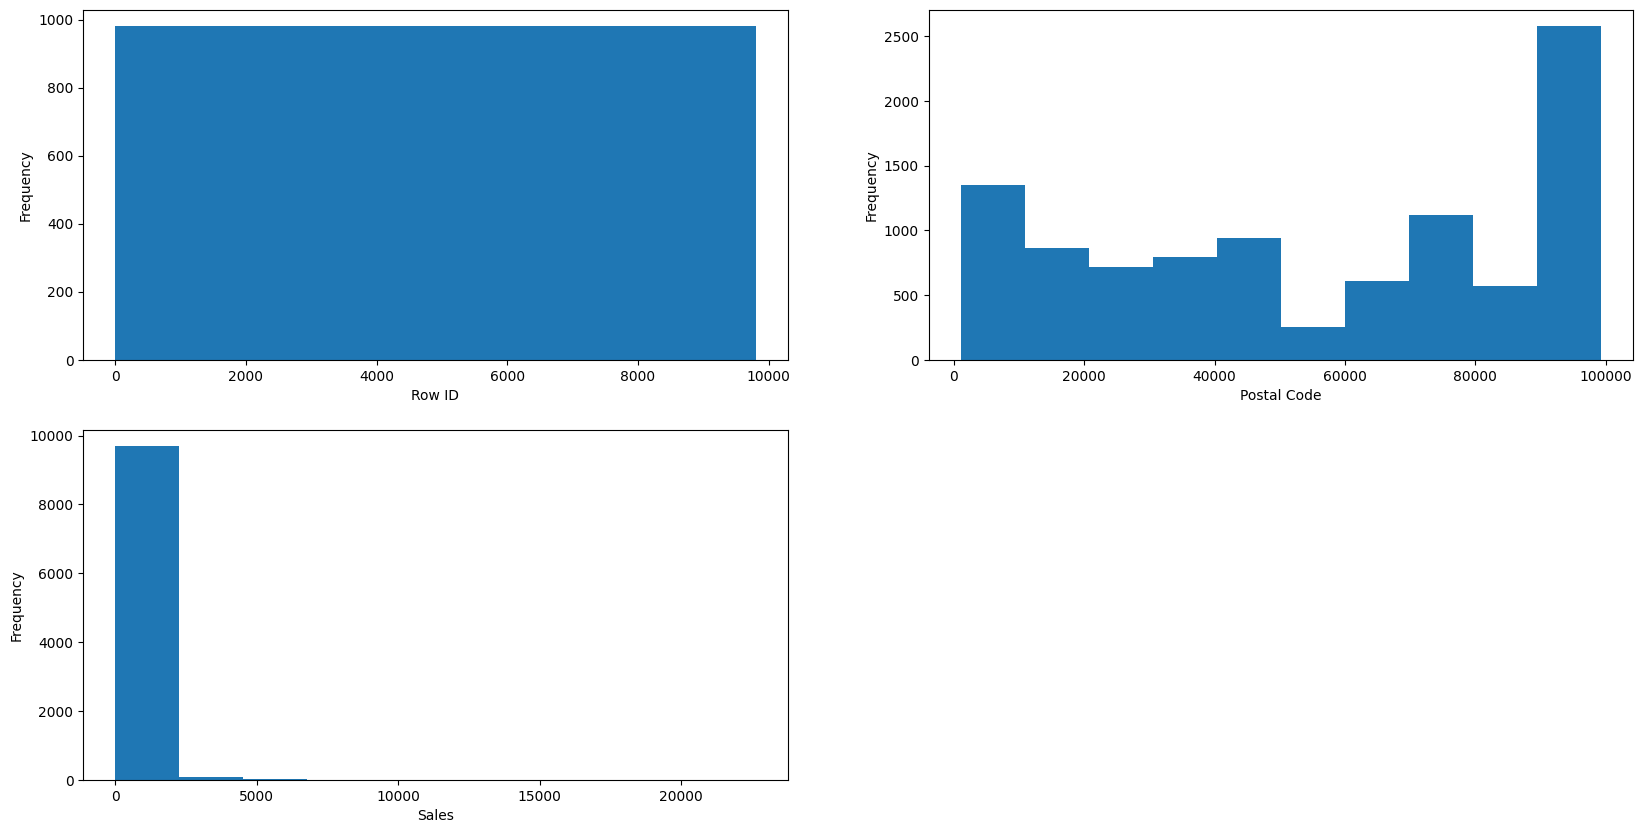

In [20]:
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    plt.hist(x= df[col])

    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
plt.show()

here, we plot histograms using seaborn lib   

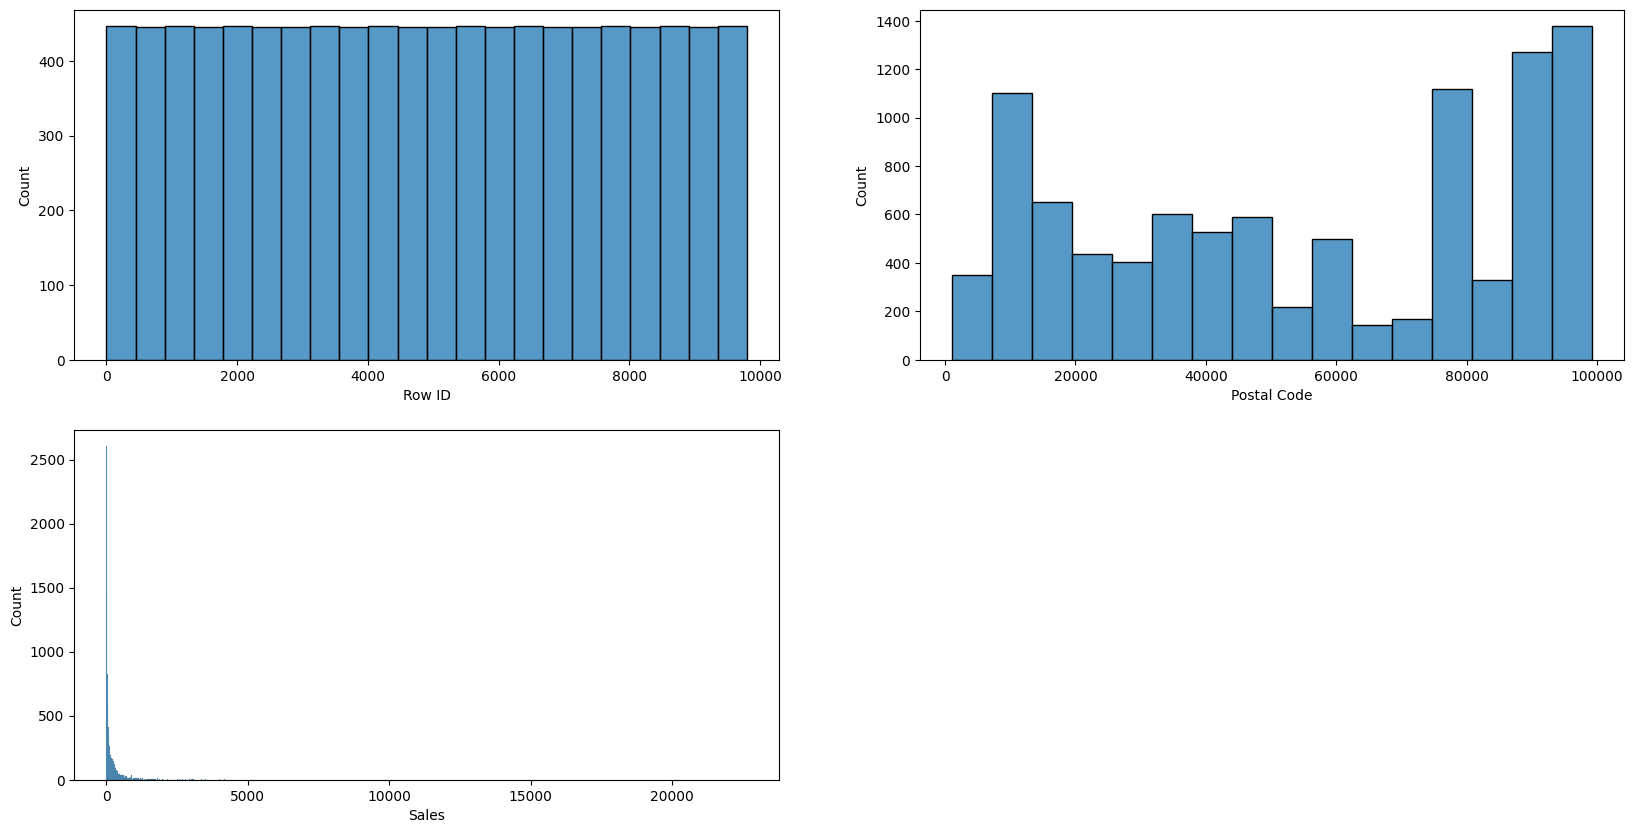

In [21]:
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.histplot(x= df[col])
plt.show()

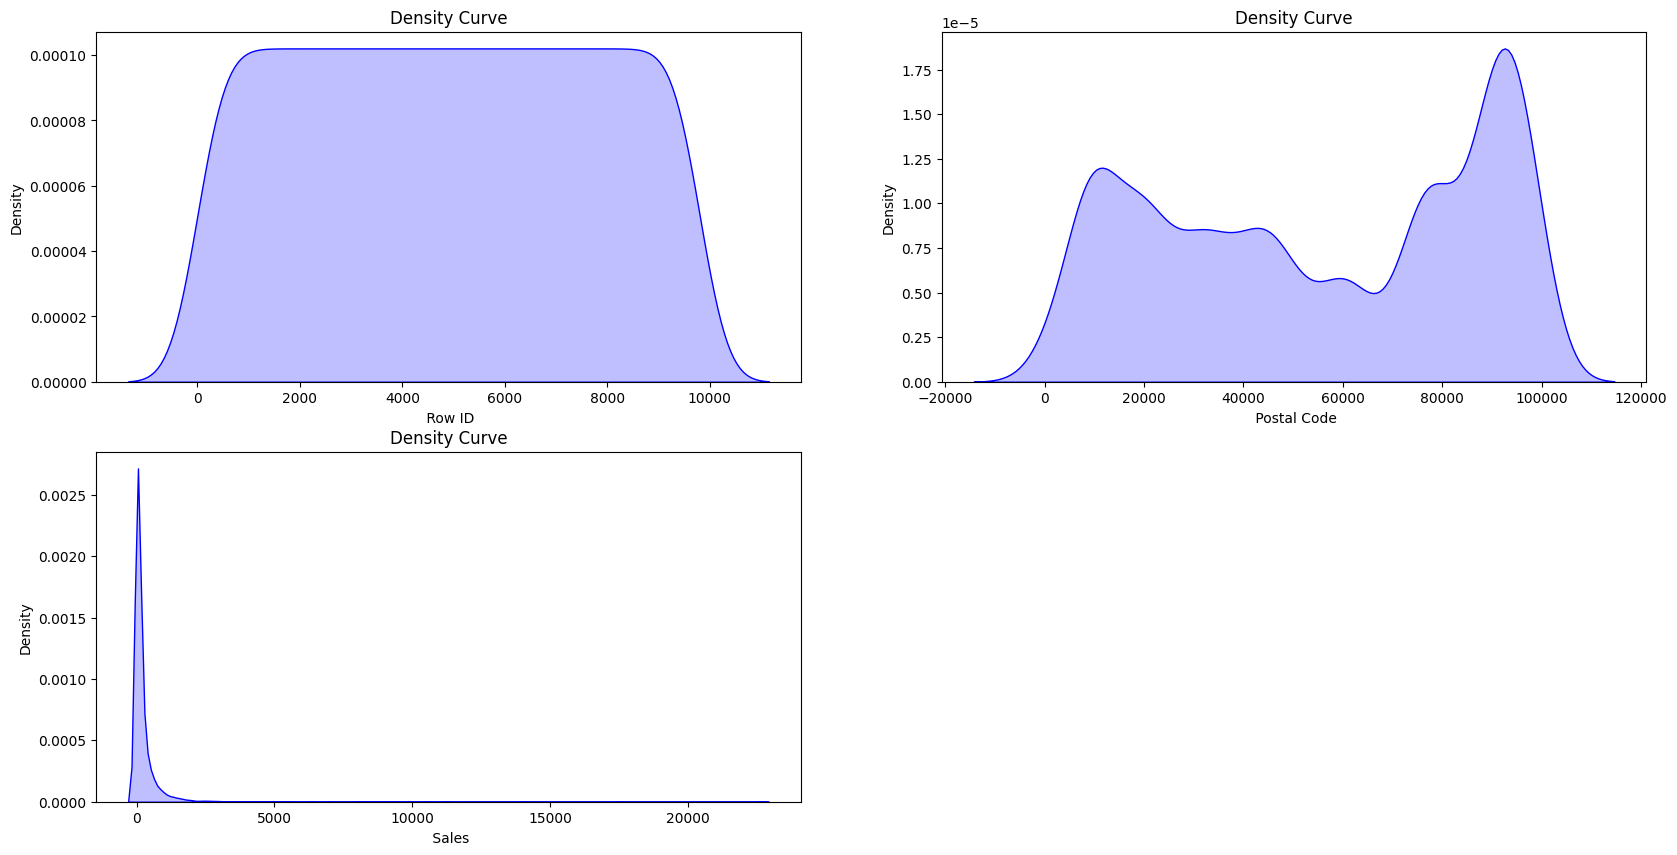

In [23]:
#Density curve (KDE):,numerical data ....continuous
plt.figure(figsize= (20, 10))

for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.kdeplot(df[col], color='blue',fill=True)
    plt.title('Density Curve')
    plt.xlabel(f" {col}")
    plt.ylabel('Density')
plt.show()



box plot to study each num var each alone to discovre the outliers perfectly, hence the hist may not be clear enough to show them
***there are many outliers in sales var ***

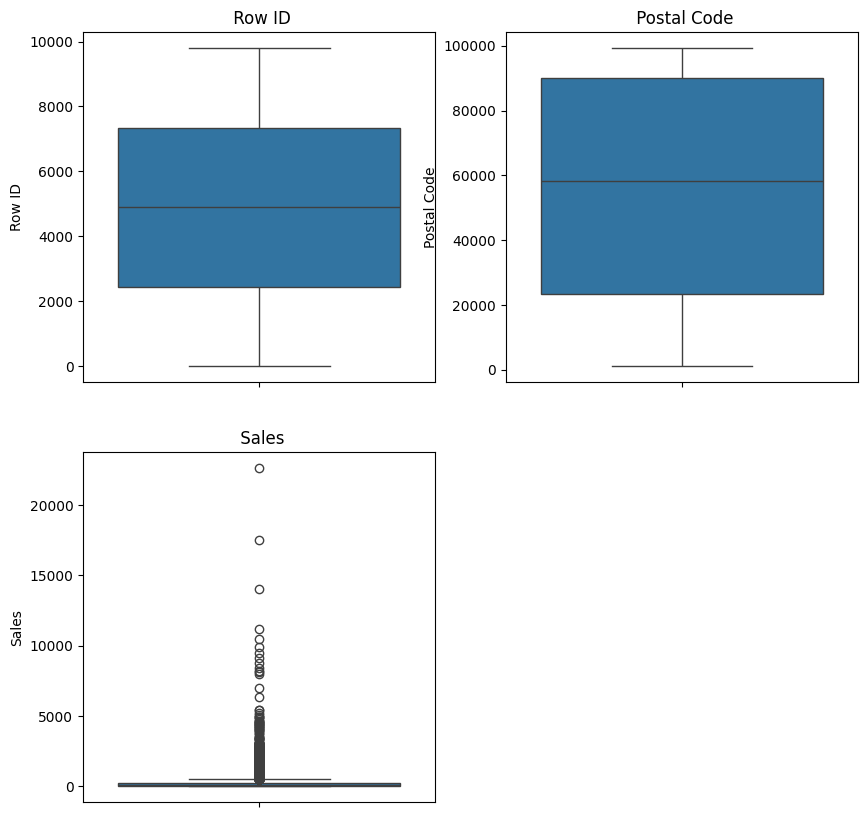

In [24]:
plt.figure(figsize= (10, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.boxplot(data= df[col])
    plt.title(f" {col}")
plt.show()

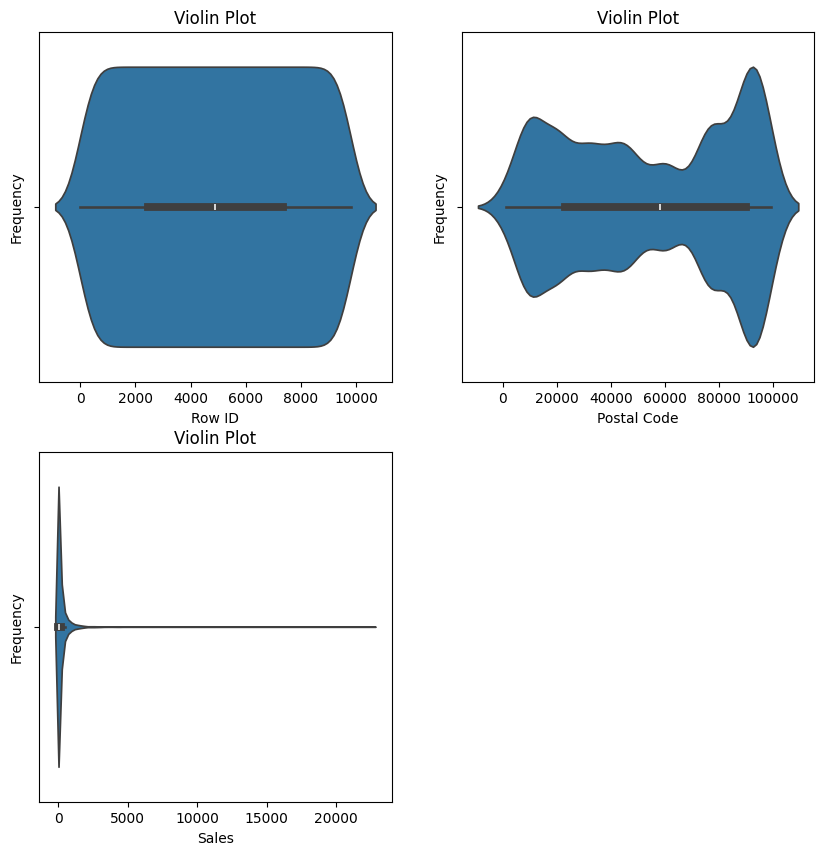

In [25]:
plt.figure(figsize= (10, 10))
for i, col in enumerate(num_col):
    plt.subplot(2, 2, i+ 1)
    sns.violinplot(x=df[col])
    plt.title('Violin Plot')
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
plt.show()

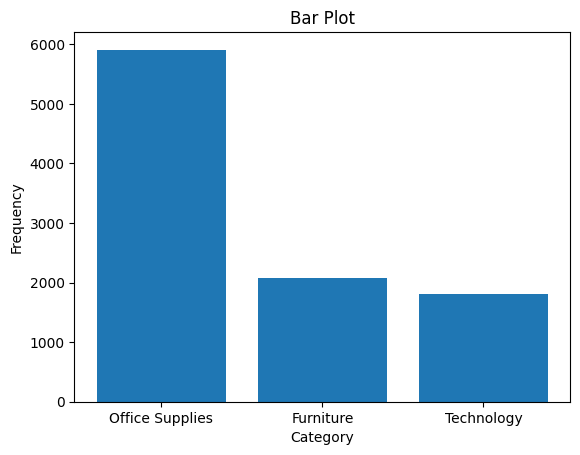

In [32]:
#bar plot :categorical data
category_counts = df['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Plot')
plt.show()

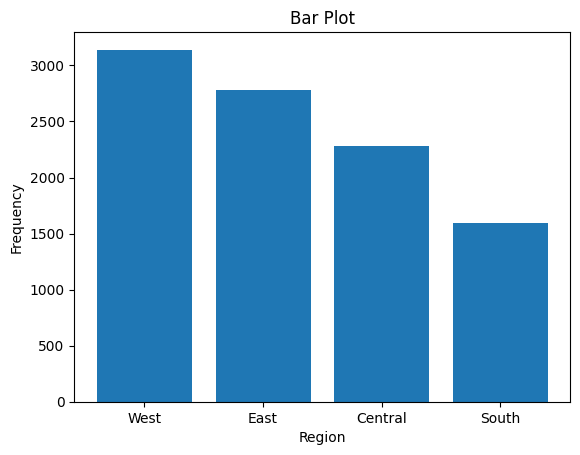

In [25]:
#bar plot :categorical data
category_counts = df['Region'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Bar Plot')
plt.show()

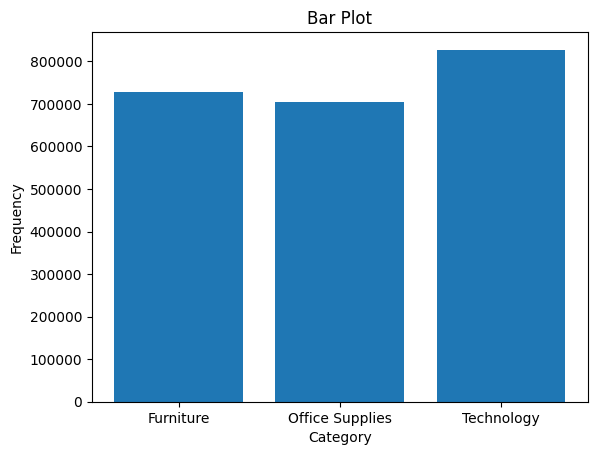

In [28]:
#bar plot :categorical data
x=df.groupby('Category')['Sales'].sum()
plt.bar(x.index, x.values)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Bar Plot')
plt.show()


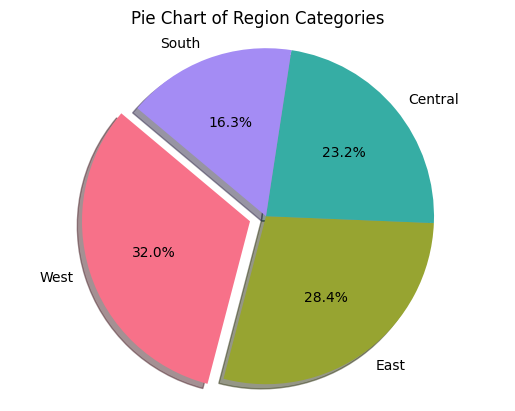

In [27]:
category_counts = df['Region'].value_counts()
labels = category_counts.index
sizes = category_counts.values
colors = sns.color_palette('husl', n_colors=len(labels))
explode = [0.1] + [0] * (len(labels) - 1) if len(labels) > 1 else [0] * len(labels)

plt.pie(sizes, labels=labels, colors=colors,
        explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Region Categories')
plt.show()

pie chart to define the percantage of each category
office supplies is the most product saled with 60%

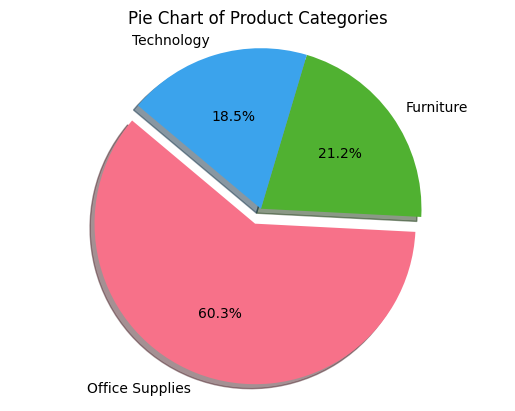

In [24]:
#pie chart :categorical data

category_counts = df['Category'].value_counts()
labels = category_counts.index
sizes = category_counts.values
colors = sns.color_palette('husl', n_colors=len(labels))
explode = [0.1] + [0] * (len(labels) - 1) if len(labels) > 1 else [0] * len(labels)

plt.pie(sizes, labels=labels, colors=colors,
        explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Product Categories')
plt.show()


## Bivariate Analysis
to study each two vars with each other

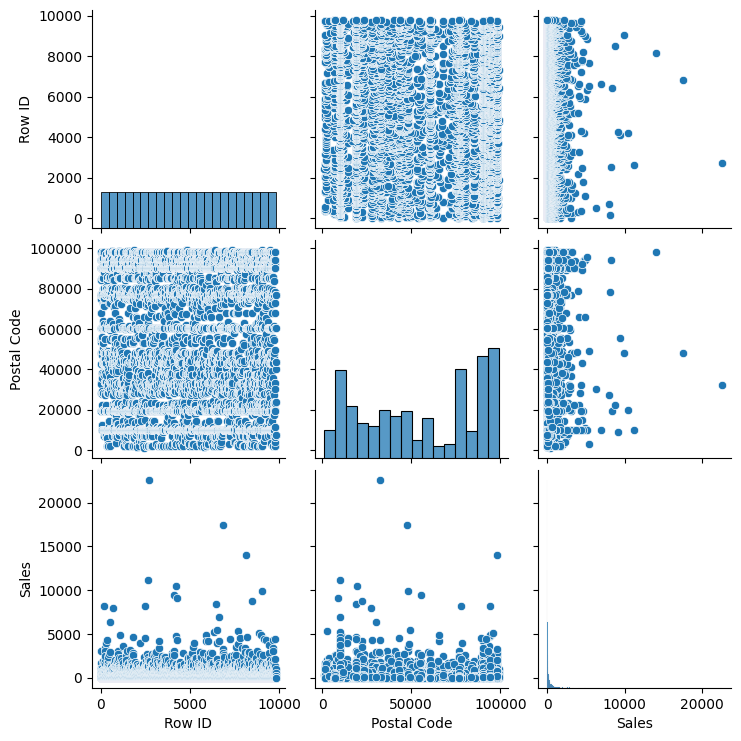

In [30]:
#scatter plot:num vs num
sns.pairplot(df)
plt.show()

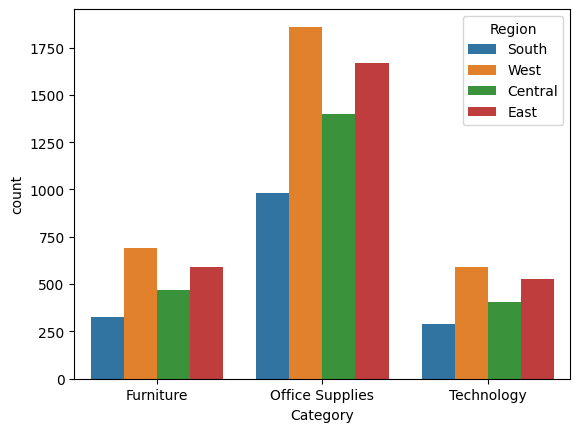

In [31]:
#bar chart:cat vs cat
sns.countplot(x=df['Category'], hue=df['Region'])
plt.show()